# Lab: Neural Nets
## CMSE 381 - Fall 2022
## Nov 28, 2022


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Neural_network_example.svg/1200px-Neural_network_example.svg.png" alt="Simple Neural Net" width="200"/>

In [1]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import time

# Building your own basic neural network

We're going to try to play with building some simple portions of the neural nets described in class.  

First up, let's try to build the following example we played with in class:
<img src="https://imgur.com/kO6zuGG.jpg" alt="Example Neural Net from Class" width="400"/>

&#9989; **<font color=red>Do this:</font>** Add code where noted below to create an automatic computation of the things we did in class. **Note: You can replace this code with the matrix version if you prefer, but this structure is built to work with the individual equations version.**

In [29]:
def MyFirstNN(X1,X2,w, beta):
    
    A = []    
    for i in range(3): 
        Ai = w[i,0] + X1*w[i,1] + X2*w[i,2] # <----- your code here
        if Ai < 0:
            Ai = 0
        else:
            pass
        A.append(Ai)
#     print(A)
    
    A = np.array(A)
    
    Y = beta[0] + beta[1]*A[0] + beta[2]*A[1] + beta[3]*A[2] # <----- your code here

    return Y

 
    
    
w = np.array([(1,2,1),(-1,0,1),(3,-1,-1)])
print(w)
beta = np.array((-1,2,1,-2))
print('(1,0) should give  1  => ', MyFirstNN(1,0,w,beta))
print('(0,1) should give -1  => ', MyFirstNN(0,1,w,beta))

[[ 1  2  1]
 [-1  0  1]
 [ 3 -1 -1]]
(1,0) should give  1  =>  1
(0,1) should give -1  =>  -1


&#9989; **<font color=red>Do this:</font>**  Play with the following code by changing around your $w$ and $\beta$ matrix values. 
- What sorts of changes occur in the resulting function value outputs?
- We're using the ReLU as our activation function above, which replaces the entry withthe positive value of the entry.  Why am I able to get negative results out of the neural net?


Text(0, 0.5, 'X2')

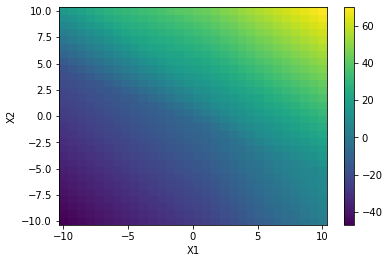

In [16]:
# Your code here #

w = np.array([(1,2,1),(-1,0,1),(3,-1,-1)]) #<----- Mess with these
beta = np.array((-1,2,1,-2))               #<----- These, too

#--- below here plots the output values for many combinations of 
#--- X1,X2

a = np.linspace(-10,10,30)
b = np.linspace(-10,10,30)
x,y = np.meshgrid(a,b)
M = np.zeros((len(a),len(b)))
for i in range(len(a)):
    for j in range(len(a)):
        M[i,j] = MyFirstNN(a[i],b[j],w, beta)
        
plt.pcolormesh(x,y,M,shading = 'auto')
plt.colorbar()
plt.xlabel('X1')
plt.ylabel('X2')

&#9989; **<font color=red>Do this:</font>** Write a modified version of your `MyFirstNN` function that uses a sigmoid function instead of ReLu. Draw a 2D heatmap plot like above. What sort of patterns can you get in the resulting output function? 


Text(0, 0.5, 'X2')

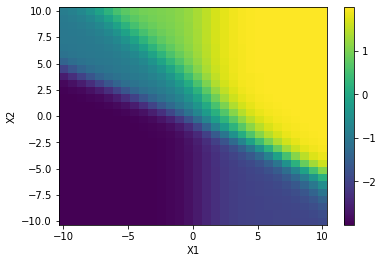

In [20]:
# Your code here #
def MyFirstNN(X1,X2,w, beta):
    
    A = []    
    for i in range(3): 
        Ai = w[i,0] + X1*w[i,1] + X2*w[i,2] # <----- your code here
        g = 1/(1 + np.exp(-Ai))
        A.append(g)
#     print(A)
    
    A = np.array(A)
    
    Y = beta[0] + beta[1]*A[0] + beta[2]*A[1] + beta[3]*A[2] # <----- your code here

    return Y


w = np.array([(1,2,1),(-1,0,1),(3,-1,-1)]) #<----- Mess with these
beta = np.array((-1,2,1,-2))               #<----- These, too

a = np.linspace(-10,10,30)
b = np.linspace(-10,10,30)
x,y = np.meshgrid(a,b)
M = np.zeros((len(a),len(b)))
for i in range(len(a)):
    for j in range(len(a)):
        M[i,j] = MyFirstNN(a[i],b[j],w, beta)
        
plt.pcolormesh(x,y,M,shading = 'auto')
plt.colorbar()
plt.xlabel('X1')
plt.ylabel('X2')

The functions you have created are what the neural net would predict given a new input data point. 

&#9989; **<font color=red>Q:</font>** For the neural net using  $w$ and $\beta$ from class, and using the sigmoid activation function, what output prediction would you get for an input $(-10,10)$? 

So of course, if we were actually building this beast, our bigger job would be to find good choices of $w$ and $\beta$ based on our available training data. Let's pretend for the moment I have the following prediction data. 

In [48]:
data = np.loadtxt('DL-toy-data.csv')
X = data[:,:2]
y = data[:,2]

&#9989; **<font color=red>Do this:</font>** Given this particular data set, what is the mean squared error for the neural net using  $w$ and $\beta$ from class, and using the sigmoid activation function?

In [59]:
# Your code here
from sklearn.metrics import mean_squared_error

w = np.array([(1,2,1),(-1,0,1),(3,-1,-1)])
beta = np.array((-1,2,1,-2))

def MyFirstNN(X,w, beta):
    Y_hat = []
    for j in range(len(X)):
        A = []  
        for i in range(3): 
            Ai = w[i,0] + X[j][0]*w[i,1] + X[j][1]*w[i,2]
            g = 1/(1 + np.exp(-Ai))
            A.append(g)
        A = np.array(A)
        Y = beta[0] + beta[1]*A[0] + beta[2]*A[1] + beta[3]*A[2]
        Y_hat.append(Y)
    Y_hat = np.array(Y_hat)    
    return Y_hat

In [60]:
yhat = MyFirstNN(X,w,beta)

In [61]:
mean_squared_error(y, yhat)

0.382954387472921



We're not going to train the model* ourselves, so let's switch now to the following online tool for training model. 

Open this website in another window: [https://playground.tensorflow.org](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4&seed=0.85627&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

*Translation: chosing better weights $w$ and $\beta$ to improve this score.


&#9989; **<font color=red>Do this:</font>** 
1. Start by working with a neural network with a single hidden layer on the data set labeled "Exclusive or". The initial setup has random weights chosen so the test loss on the right isn't very good. Hit the play button to watch the model find better and better weights to improve the prediction. 
2. Hover over the neurons on your trained model. What does the colormap shown on the right mean?
2. What does the thickness/color of the edges between features/neurons mean? How does it align with our notation from class?
2. What happens when you train the model using more or less neurons (hidden units) in the layer? What happens if you increase 
3. What happens when you train the same model on the spiral data set? 
4. If your settings are like mine, the sprial data set results are not good. Play with parameters until you can get test loss below 10\% on the spiral data set.



-----
### Congratulations, we're done!
Written by Dr. Liz Munch, Michigan State University

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.